# KNN for classification and imputation

In this lab you'll practice using KNN for classification first, then explore how it can be used for effective variable imputation.

---

### 1. Load packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.neighbors import KNeighborsClassifier

In [2]:
import imp
plotter = imp.load_source('plotter', '/Users/kiefer/github-repos/DSI-SF-2/utils/plotting/knn_plotter.py')
from plotter import KNNBoundaryPlotter

---

### 3. Load datasets


In [3]:
affair = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-2/datasets/affairs/affair.csv')
churn = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-2/datasets/cell_phone_churn/cell_phone_churn.csv')
coffee = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-2/datasets/coffee_preferences/dat12-coffee-preferences.csv')

---

### 4. Encode affairs vs. not in affair dataset 

This will be your binary target class variable.

In [4]:
def binary_affair(x):
    if x == 0:
        return 0
    else:
        return 1
    
affair['had_affair'] = affair.nbaffairs.map(binary_affair)

y = affair.had_affair.values

---

### 5. Clean and convert string variables

In [5]:
affair.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,had_affair
0,1,male,37.0,10.00,no,3,18,7,4,0,0
1,2,female,27.0,4.00,no,4,14,6,4,0,0
2,3,female,32.0,15.00,yes,1,12,1,4,0,0
3,4,male,57.0,15.00,yes,5,18,6,5,0,0
4,5,male,22.0,0.75,no,2,17,6,3,0,0


In [6]:
affair.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
affair.sex.unique()

array(['male', 'female'], dtype=object)

In [8]:
affair.child.unique()

array(['no', 'yes'], dtype=object)

In [9]:
affair.sex = affair.sex.map(lambda x: 1 if x == 'male' else 0)
affair.child = affair.child.map(lambda x: 1 if x == 'yes' else 0)

---

### 6. Fit a `KNeighborsClassifier` with `weights='uniform'` and `n_neighbors=3`

You should choose **2 predictor variables** to predict had affair vs. not

In [10]:
np.mean(y)

0.24958402662229617

In [11]:
X = affair[['age','religious']].values

knn_uni_n3 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_uni_n3.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

---

### 7. Cross-validate the classifier with `StratifiedKFold`



In [12]:
from sklearn.cross_validation import StratifiedKFold

cv_indices = StratifiedKFold(y, n_folds=5)

# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, y, knn, cv_indices):
    
    scores = []
    
    for train_i, test_i in cv_indices:
        
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        y_train = y[train_i]
        y_test = y[test_i]

        knn.fit(X_train, y_train)
        
        acc = knn.score(X_test, y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)
        
    print('Mean CV accuracy:', np.mean(scores))
    
accuracy_crossvalidator(X, y, knn_uni_n3, cv_indices)

('Fold accuracy:', 0.73553719008264462)
('Fold accuracy:', 0.71666666666666667)
('Fold accuracy:', 0.7416666666666667)
('Fold accuracy:', 0.70833333333333337)
('Fold accuracy:', 0.69999999999999996)
('Mean CV accuracy:', 0.7204407713498624)


---

### 8. Do the same but with  `n_neighbors=11`

Use the same predictor variables and cv folds.

In [13]:
knn_uni_n11 = KNeighborsClassifier(n_neighbors=11, weights='uniform')
knn_uni_n11.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [14]:
accuracy_crossvalidator(X, y, knn_uni_n11, cv_indices)

('Fold accuracy:', 0.72727272727272729)
('Fold accuracy:', 0.73333333333333328)
('Fold accuracy:', 0.7416666666666667)
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.75)
('Mean CV accuracy:', 0.74045454545454548)


---

### 9. Cross-validate a model with  `n_neighbors=11` and `weights='distance'`

In [15]:
knn_dist_n11 = KNeighborsClassifier(n_neighbors=11, weights='distance')
knn_dist_n11.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='distance')

In [16]:
accuracy_crossvalidator(X, y, knn_dist_n11, cv_indices)

('Fold accuracy:', 0.71900826446280997)
('Fold accuracy:', 0.72499999999999998)
('Fold accuracy:', 0.75)
('Fold accuracy:', 0.7416666666666667)
('Fold accuracy:', 0.75)
('Mean CV accuracy:', 0.73713498622589535)


---

### 10. [Optional] Explore the model visually with the `KNNBoundaryPlotter`

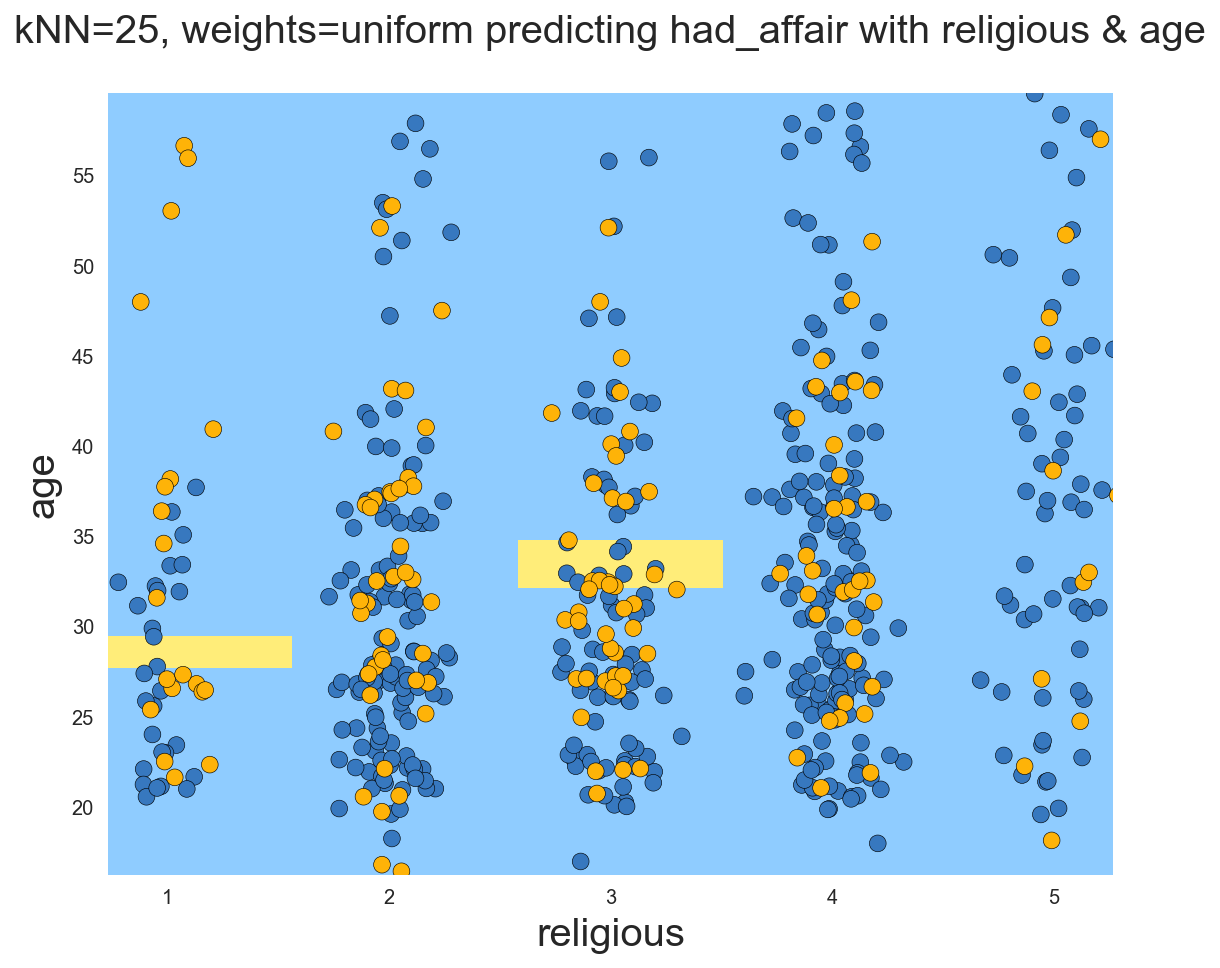

In [18]:
kbp = KNNBoundaryPlotter(affair, 'religious', 'age', 
                         'had_affair', nn_range=range(1,26))

kbp.knn_mesh_runner()

kbp.knn_interact()

---

### 11. With the churn dataset, find the optimal neighbors and weighting to predict churn using gridsearch

Show the cross-validated accuracy of the model.

In [19]:
from sklearn.grid_search import GridSearchCV

In [20]:
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
churn.churn.unique()

array([False, True], dtype=object)

In [22]:
churn.churn = churn.churn.map(lambda x: 1 if x else 0)

In [23]:
churn.intl_plan = churn.intl_plan.map(lambda x: 1 if x == 'yes' else 0)
churn.vmail_plan = churn.vmail_plan.map(lambda x: 1 if x == 'yes' else 0)


In [24]:
y = churn.churn.values
X = churn[[col for col in churn.columns if not col in ['state','churn']]].values

In [28]:
params = {
    'n_neighbors':range(1,20),
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, params, cv=4, verbose=1)

knn_gs.fit(X, y)

Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    5.9s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [29]:
print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

{'n_neighbors': 13, 'weights': 'distance'}


In [30]:
cv_indices = StratifiedKFold(y, n_folds=5)

accuracy_crossvalidator(X, y, best_knn, cv_indices)

('Fold accuracy:', 0.88455772113943032)
('Fold accuracy:', 0.8710644677661169)
('Fold accuracy:', 0.88005997001499248)
('Fold accuracy:', 0.87687687687687688)
('Fold accuracy:', 0.88288288288288286)
('Mean CV accuracy:', 0.87908838373605991)


---

## Variable imputation with KNeighbors

You can actually do both classification _and_ regression with KNN. It is quite flexible due to its simplicity. One of it's most useful features is the ability to perform very nice imputation.

---

### 12. Look at the coffee data, count the missing values

In [31]:
coffee.head()

,Timestamp,Name,Starbucks,PhilzCoffee,BlueBottleCoffee,PeetsTea,CaffeTrieste,GrandCoffee,RitualCoffee,FourBarrel,WorkshopCafe
0,3/17/2015 18:37:58,Alison,3,5,4.0,3.0,NaN,NaN,5.0,5.0,NaN
1,3/17/2015 18:38:09,April,4,5,5.0,3.0,NaN,NaN,3.0,NaN,5.0
2,3/17/2015 18:38:25,Vijay,3,5,5.0,5.0,3.0,2.0,1.0,1.0,1.0
3,3/17/2015 18:38:28,Vanessa,1,5,5.0,2.0,NaN,NaN,3.0,2.0,3.0
4,3/17/2015 18:38:46,Isabel,1,4,4.0,2.0,4.0,NaN,4.0,4.0,NaN


In [32]:
coffee.isnull().sum()

Timestamp            0
Name                 0
Starbucks            0
PhilzCoffee          0
BlueBottleCoffee     6
PeetsTea             1
CaffeTrieste        12
GrandCoffee         15
RitualCoffee         7
FourBarrel          10
WorkshopCafe         8
dtype: int64

---

### 13. For each of the missing columns, build a `KNeighborsClassifier` to predict rating for that column based on the other columns

Another great benefit of KNN is the ease with which it can do multi-class problems like this.

[Note: there is a more complicated way to do this, but I am doing it the simple way.]

In [33]:
rating_cols = [col for col in coffee.columns if not col in ['Timestamp','Name']]

predictors = coffee[rating_cols]

predictors.dropna(inplace=True, axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
predictors

,Starbucks,PhilzCoffee
0,3,5
1,4,5
2,3,5
3,1,5
4,1,4
5,5,3
6,4,5
7,3,5
8,3,4
9,1,5


In [29]:
coffee_imputed = coffee.copy()

for col in rating_cols:
    if col not in predictors.columns:
        # cols -> ['blue bottle', 'starbucks', 'philz']
        cols = [col]+list(predictors.columns)
        # dataset with the 3 columns
        to_impute = coffee[cols]
        # drop all na
        to_impute_valid = to_impute.dropna()
        
        # build model predicting blue bottle from starbucks and philz
        knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
        knn.fit(to_impute_valid[predictors.columns].values, to_impute_valid[col].values)

        # make the predictions for the missing values in blue bottle
        pred = predictors.loc[to_impute[col].isnull(), :]
        pred = knn.predict(pred)
        
        # put the predicted values for blue bottle into the "imputed
        coffee_imputed.loc[to_impute[col].isnull(), col] = pred


In [30]:
coffee

,Timestamp,Name,Starbucks,PhilzCoffee,BlueBottleCoffee,PeetsTea,CaffeTrieste,GrandCoffee,RitualCoffee,FourBarrel,WorkshopCafe
0,3/17/2015 18:37:58,Alison,3,5,4.0,3.0,2.0,2.0,5.0,5.0,1.0
1,3/17/2015 18:38:09,April,4,5,5.0,3.0,2.0,2.0,3.0,1.0,5.0
2,3/17/2015 18:38:25,Vijay,3,5,5.0,5.0,3.0,2.0,1.0,1.0,1.0
3,3/17/2015 18:38:28,Vanessa,1,5,5.0,2.0,4.0,2.0,3.0,2.0,3.0
4,3/17/2015 18:38:46,Isabel,1,4,4.0,2.0,4.0,2.0,4.0,4.0,1.0
5,3/17/2015 18:39:01,India,5,3,3.0,3.0,3.0,1.0,3.0,3.0,3.0
6,3/17/2015 18:39:01,Dave H,4,5,4.0,5.0,2.0,2.0,3.0,1.0,1.0
7,3/17/2015 18:39:05,Deepthi,3,5,4.0,2.0,2.0,2.0,1.0,1.0,2.0
8,3/17/2015 18:39:14,Ramesh,3,4,4.0,3.0,3.0,2.0,1.0,1.0,4.0
9,3/17/2015 18:39:23,Hugh Jass,1,5,5.0,4.0,5.0,2.0,5.0,4.0,1.0
